In [1]:
import numpy as np
import mne
import matplotlib.pyplot as plt
from pyESN import ESN
from Encode import SpikeEncoder

In [2]:
data = mne.read_epochs(
    '../processed_schizophrenic_eeg-epo.fif', preload=True)

Reading d:\research-reservoir\Schizo-hormone\Serotonin-based\..\processed_schizophrenic_eeg-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...    1996.00 ms
        0 CTF compensation matrices available
Not setting metadata
15819 matching events found
No baseline correction applied
0 projection items activated


In [3]:
eeg_data = data.get_data()  
labels = data.events[:, -1]  

C:\Users\anisr\AppData\Local\Temp\ipykernel_15172\2885792738.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = data.get_data()


In [4]:
eeg_data = eeg_data.reshape(eeg_data.shape[0], -1)

In [5]:
eeg_data = (eeg_data - np.min(eeg_data)) /   \
    (np.max(eeg_data) - np.min(eeg_data))

In [6]:
encoder = SpikeEncoder()
encoded_spikes = np.array([encoder.encode(eeg_channel) for eeg_channel in eeg_data.T]).T

In [13]:
esn = ESN(n_inputs=encoded_spikes.shape[1],
          n_outputs=encoded_spikes.shape[1],
          n_reservoir=100, 
          sparsity=0.1,
          spectral_radius=0.95,
          random_state=42)

In [14]:
train_fraction = 0.7
train_len = int(len(encoded_spikes) * train_fraction)

In [15]:
esn.fit(encoded_spikes[:train_len], encoded_spikes[:train_len])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
prediction_horizon = 100
predicted_spikes = esn.predict(encoded_spikes[-prediction_horizon:])

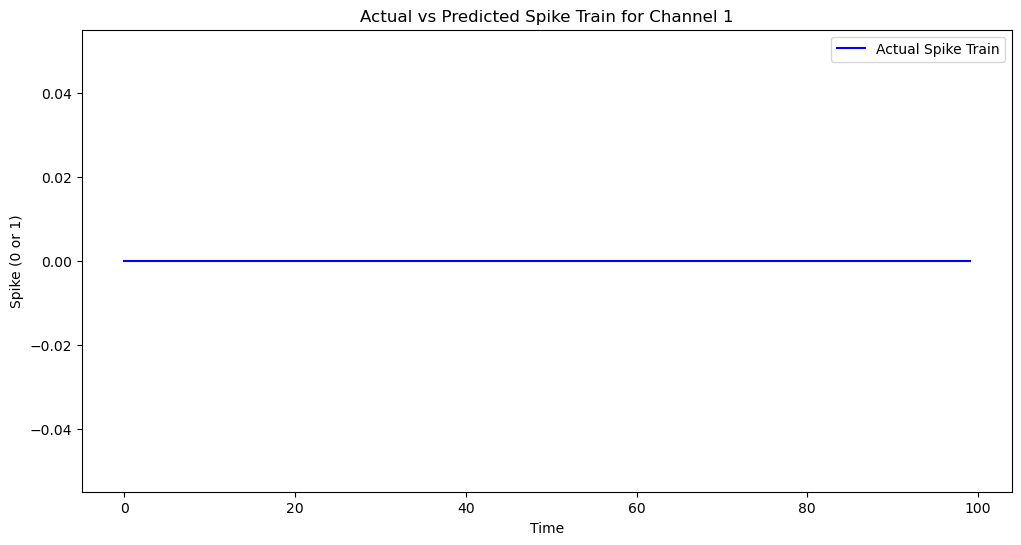

In [19]:
channel = 0
plt.figure(figsize=(12, 6))
plt.plot(encoded_spikes[-prediction_horizon:, channel],
         label='Actual Spike Train', color='blue')
# plt.plot(predicted_spikes[:, channel],
#          label='Predicted Spike Train', color='red')
plt.legend()
plt.title("Actual vs Predicted Spike Train for Channel {}".format(channel + 1))
plt.xlabel("Time")
plt.ylabel("Spike (0 or 1)")
plt.show()

In [18]:
trend_changes = np.diff(np.sum(predicted_spikes, axis=1))
trend_sign = np.sign(trend_changes)

# Display the detected trends
trend_changes_detected = []
for i in range(1, len(trend_sign)):
    if trend_sign[i] != trend_sign[i-1]:
        trend_changes_detected.append(
            (i, "Increase" if trend_sign[i] > 0 else "Decrease"))

print("Detected Trend Changes:")
for epoch, trend in trend_changes_detected:
    print(f"Epoch {epoch + 1}: {trend}")

Detected Trend Changes:
Epoch 3: Decrease
Epoch 4: Increase
Epoch 5: Decrease
Epoch 6: Increase
Epoch 7: Decrease
Epoch 8: Increase
Epoch 10: Decrease
Epoch 11: Increase
Epoch 12: Decrease
Epoch 15: Increase
Epoch 18: Decrease
Epoch 21: Increase
Epoch 22: Decrease
Epoch 23: Increase
Epoch 24: Decrease
Epoch 26: Increase
Epoch 27: Decrease
Epoch 28: Increase
Epoch 30: Decrease
Epoch 31: Increase
Epoch 33: Decrease
Epoch 34: Increase
Epoch 36: Decrease
Epoch 38: Increase
Epoch 39: Decrease
Epoch 41: Increase
Epoch 43: Decrease
Epoch 44: Increase
Epoch 45: Decrease
Epoch 46: Increase
Epoch 48: Decrease
Epoch 50: Increase
Epoch 51: Decrease
Epoch 52: Increase
Epoch 53: Decrease
Epoch 55: Increase
Epoch 57: Decrease
Epoch 59: Increase
Epoch 60: Decrease
Epoch 62: Increase
Epoch 64: Decrease
Epoch 65: Increase
Epoch 66: Decrease
Epoch 67: Increase
Epoch 68: Decrease
Epoch 71: Increase
Epoch 72: Decrease
Epoch 73: Increase
Epoch 74: Decrease
Epoch 76: Increase
Epoch 78: Decrease
Epoch 79: Inc